[[64  4]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


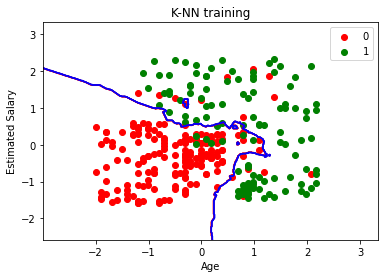

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Social_Network_Ads.csv") #import dataset
x= data.iloc[:,[2,3]].values 
y= data.iloc[:, -1].values

#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#Training the knn models on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
classifier.fit(x_train, y_train)

#predicting the test set result
y_pred = classifier.predict(x_test) 

#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualising the training set result 
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() -1, stop=x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contour(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75, cmap = ListedColormap(('red','blue')))

plt.xlim(x1.min(), x2.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set== j,1],
                c=ListedColormap(('red','green'))(i), label = j)

plt.title('K-NN training')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()